In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
data = pd.read_csv('house-votes-84.data.csv', header = None)
data = data.replace('y', 1)
data = data.replace('n', 0)

for column in data.columns[:-2]:
    data[column] = data[column].replace('?', np.mean(data[column][data[column] != '?']))
    
data[16] = data[16].apply(lambda x: x.replace('.', ''))

In [72]:
from sklearn.cross_validation import train_test_split

X, y = data[data.columns[:-2]], data[data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train = [1 if i == 'democrat' else 0 for i in y_train]
y_test = [1 if i == 'democrat' else 0 for i in y_test]

In [93]:


from sklearn import neighbors, metrics, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

knn_clf = neighbors.KNeighborsClassifier(n_neighbors=6)
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
knn_y_pred = knn_clf.predict_proba(X_test)[:,1]


log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_pred = log_clf.predict(X_test)
log_y_pred = log_clf.predict_proba(X_test)[:,1]

bayes_clf = GaussianNB()
bayes_clf.fit(X_train, y_train)
bayes_pred = bayes_clf.predict(X_test)
bayes_y_pred = bayes_clf.predict_proba(X_test)[:,1]

tree_clf = ensemble.RandomForestClassifier()
tree_clf.fit(X_train, y_train)
tree_pred = tree_clf.predict(X_test)
tree_y_pred = tree_clf.predict_proba(X_test)[:,1]

In [94]:
print metrics.classification_report(knn_pred, y_test)
print metrics.classification_report(log_pred, y_test)
print metrics.classification_report(bayes_pred, y_test)
print metrics.classification_report(tree_pred, y_test)

             precision    recall  f1-score   support

          0       0.97      0.90      0.94        40
          1       0.94      0.99      0.96        69

avg / total       0.95      0.95      0.95       109

             precision    recall  f1-score   support

          0       0.95      0.97      0.96        36
          1       0.99      0.97      0.98        73

avg / total       0.97      0.97      0.97       109

             precision    recall  f1-score   support

          0       0.95      0.95      0.95        37
          1       0.97      0.97      0.97        72

avg / total       0.96      0.96      0.96       109

             precision    recall  f1-score   support

          0       0.97      0.95      0.96        38
          1       0.97      0.99      0.98        71

avg / total       0.97      0.97      0.97       109



In [95]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, bayes_y_pred)
roc_auc = auc(fpr, tpr)

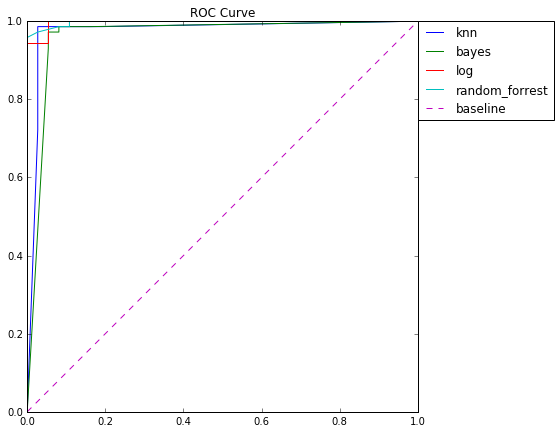

In [124]:
preds = [knn_y_pred, bayes_y_pred, log_y_pred, tree_y_pred]
names = ['knn', 'bayes', 'log', 'random_forrest']
for i, pred in enumerate(preds):
    fpr, tpr, _ = roc_curve(y_test, pred)
    plt.plot(fpr,tpr, label = names[i])
g = plt.title('ROC Curve')
g.figure.set_size_inches(7,7)
plt.plot([0,1],[0,1], '--', label = 'baseline')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.show()

In [131]:
from sklearn.cross_validation import cross_val_scores
clfs = [knn_clf, tree_clf, log_clf, bayes_clf]

for i, clf in enumerate(clfs):
    print names[i]
    print "Precision: %r" %np.mean(cross_val_score(clf, X_train, y_train, scoring = 'precision'))
    print "Recall: %r" %np.mean(cross_val_score(clf, X_train, y_train, scoring = 'recall'))
    print "F1 Score: %r" %np.mean(cross_val_score(clf, X_train, y_train, scoring = 'f1'))
    print '-------------'

knn
Precision: 0.97267759562841538
Recall: 0.89743589743589747
F1 Score: 0.93341076267905543
-------------
bayes
Precision: 0.97299475013290804
Recall: 0.93846153846153857
F1 Score: 0.95084660421115308
-------------
log
Precision: 0.9638573232323232
Recall: 0.95897435897435901
F1 Score: 0.96135866027575589
-------------
random_forrest
Precision: 0.94853294853294867
Recall: 0.94871794871794879
F1 Score: 0.94851304071246811
-------------


In [159]:
movies = pd.read_csv('2013_movies.csv')
movies = movies.dropna()
movies.columns = [column.lower() for column in movies.columns]

In [160]:
movies.head()

,title,budget,domestictotalgross,director,rating,runtime,releasedate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [161]:
y, X = movies['rating'], movies[['budget', 'runtime']]

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [176]:

tree_model = ensemble.RandomForestClassifier()
tree_model.fit(X_train, y_train)
pre_score = metrics.precision_score(y_test, tree_model.predict(X_test))
re_score = metrics.recall_score(y_test, tree_model.predict(X_test))

print 'Precision Score is %r and Recall is %r'% (pre_score, re_score)

Precision Score is 0.391358024691358 and Recall is 0.37037037037037035


/Users/Fernanhid/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/Fernanhid/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scori